<a href="https://colab.research.google.com/github/HYChangTAMU/Projects/blob/main/Project2/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2
Task:

1. Examining commonly used metric using stocks selected in project 1
2. Running simulation on a simple game to demonstrate risk difference

## Metrics
Using the data from project 1 and assume that we own $100 million of each stock.\
We want to compute the following quantities:

1. individual value at risk (VaR) and portfolio VaR

2. the Sharpe ratios using annual quantities for each stock

3. the maximum drawdown for each stock

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# !rm -r Financial-Data-Analysis
!git clone https://github.com/HYChangTAMU/Financial-Data-Analysis.git
%cd Financial-Data-Analysis
!pwd

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)


# setup the raw dataframes
# AAPL, TXN, and GRMN have historical dividends
# HLIT and QMCO did not pay dividend, so their dividends column are all NaN
# the data of each stock comes from Yahoo Finance
aapl = pd.merge(pd.read_csv("./Assignment1/Data/1AAPL.csv"), pd.read_csv("./Assignment1/Data/1AAPL_div.csv"), on = "Date", how = "outer")
txn = pd.merge(pd.read_csv("./Assignment1/Data/2TXN.csv"), pd.read_csv("./Assignment1/Data/2TXN_div.csv"), on = "Date", how = "outer")
grmn = pd.merge(pd.read_csv("./Assignment1/Data/3GRMN.csv"), pd.read_csv("./Assignment1/Data/3GRMN_div.csv"), on = "Date", how = "outer")
hlit = pd.read_csv("./Assignment1/Data/4HLIT.csv")
hlit["Dividends"] = np.nan
qmco = pd.read_csv("./Assignment1/Data/5QMCO.csv")
qmco["Dividends"] = np.nan


# rfr is the risk free rate data
# the risk free rate date comes from Kenneth R. French's Data Library
rfr = pd.read_csv("./Assignment1/Data/0RF.csv")


# defining years
# assuming that we always trade on July 01 before closing
# If July 01 was on weekend, we use the price on the previous Friday.
y03 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2003-07-01', end = '2004-07-01')]
y04 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2004-07-01', end = '2005-07-01')]
y05 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2005-07-01', end = '2006-06-30')]
y06 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2006-06-30', end = '2007-06-29')]
y07 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2007-06-29', end = '2008-07-01')]
y08 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2008-07-01', end = '2009-07-01')]
y09 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2009-07-01', end = '2010-07-01')]
y10 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2010-07-01', end = '2011-07-01')]
y11 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2011-07-01', end = '2012-06-29')]
y12 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2012-06-29', end = '2013-07-01')]
y13 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2013-07-01', end = '2014-07-01')]
y14 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2014-07-01', end = '2015-07-01')]
y15 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2015-07-01', end = '2016-07-01')]
y16 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2016-07-01', end = '2017-06-30')]
y17 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2017-06-30', end = '2018-06-29')]
y18 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2018-06-29', end = '2019-07-01')]
y19 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2019-07-01', end = '2020-07-01')]
y20 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2020-07-01', end = '2021-07-01')]
y21 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2021-07-01', end = '2022-07-01')]
y22 = [d.strftime('%Y-%m-%d') for d in pd.date_range(start = '2022-07-01', end = '2023-06-30')]

yrs_array = [y03, y04, y05, y06, y07, y08, y09, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19, y20, y21, y22]
yrs_date = [i[0] for i in yrs_array] + [y22[-1]]
yrs_list = [2003 + i for i in range(21)]
yrs_series = pd.Series(yrs_list)


# calculate daily return including dividends
def daily_rtn(x):
  rtn = [None] + [(x["Dividends"][i+1] + x["Close"][i+1] - x["Close"][i])/x["Close"][i] if not pd.isna(x["Dividends"][i+1]) else (x["Close"][i+1] - x["Close"][i])/x["Close"][i] for i in range(len(x["Close"]) - 1)]
  return rtn

# relevant data for daily return
def daily_data(x):
  x["Daily Rtn"] = daily_rtn(x)
  return x[["Date", "Close", "Dividends", "Daily Rtn"]]


# relevant daily dataframes
# Note that the risk free rate was given in percentage, so we divide it by 100
aapl_day = daily_data(aapl)
txn_day = daily_data(txn)
grmn_day = daily_data(grmn)
hlit_day = daily_data(hlit)
qmco_day = daily_data(qmco)
rfr_day = pd.DataFrame({"Date": aapl['Date'], 'Daily Rtn': rfr['RF'] / 100})

Cloning into 'Financial-Data-Analysis'...
remote: Enumerating objects: 191, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 191 (delta 7), reused 0 (delta 0), pack-reused 157
Receiving objects: 100% (191/191), 1.05 MiB | 6.62 MiB/s, done.
Resolving deltas: 100% (70/70), done.
/content/Financial-Data-Analysis
/content/Financial-Data-Analysis


### Value at Risk (VaR)
We would like to calculate the **VaR** at 99% confidence level for the vext 10 days for each stock and the portfolio.\
The formula is:

VaR = money in management × percentage volatility × sqrt(10) × 2.33

We use only the prices from the last year and round the numbers to 2 decimal places.

In [ ]:
# for the percentage volatility of each stock, we calculate std(closing price) / mean(closing price) of the daily data in the last year.
def percentage_volatility(x):
  return x.loc[x["Date"].isin(y22)]['Close'].std() / x.loc[x["Date"].isin(y22)]['Close'].mean()

# VaR = money in management × percentage volatility × sqrt(10) × 2.33
def VaR(x):
  return 1000000 * percentage_volatility(x) * np.sqrt(10) * 2.33

In [ ]:
print(f"VaR for AAPL: {VaR(aapl_day):.2f}")

VaR for AAPL: 698461.60


In [ ]:
print(f"VaR for TXN : {VaR(txn_day):.2f}")

VaR for TXN : 361634.69


In [ ]:
print(f"VaR for GRMN: {VaR(grmn_day):.2f}")

VaR for GRMN: 530375.14


In [ ]:
print(f"VaR for HLIT: {VaR(hlit_day):.2f}")

VaR for HLIT: 1172313.38


In [ ]:
print(f"VaR for QMCO: {VaR(qmco_day):.2f}")

VaR for QMCO: 1608395.25


For the portfolio, the total asset at time t is X(t) = ( Σ ω_i P_i(t) / P_i(0) ) × X(0) \
where ω_i is the weight of each asset, and P_i(t) is the unit price of each stock.

The percentage volatility can be found by\
σ[X(t)] / E[X(t)] = σ[Σ ω_i P_i(t) / P_i(0)] / E[Σ ω_i P_i(t) / P_i(0)]\
Let's define the time evolution factor U(t, 0) as\
U(t, 0) = Σ ω_i P_i(t) / P_i(0)

In our case, we have five stocks with $1 Million each. The weights are all 0.2.

In [ ]:
# We can calculate U(t, 0) using the daily data
portfolio_day = pd.DataFrame({'Date': aapl_day.loc[aapl_day['Date'].isin(y22)]['Date']})
portfolio_day["U"] = 0
for x in [aapl_day, txn_day, grmn_day, hlit_day, qmco_day]:
  portfolio_day["U"] += x.loc[x['Date'].isin(y22)]['Close'] * 0.2 / x.iloc[4784]["Close"]

# The percentage volatility of the portfolio is
print('The percentage volatility of the portfolio is {x:.4f} %'.format(x = 100 * portfolio_day['U'].std() / portfolio_day['U'].mean()))

The percentage volatility of the portfolio is 6.0061 %


**The VaR of the portfolio** is again:\
VaR = money in management × percentage volatility × sqrt(10) × 2.33\
where the money in management is now $5 Million.

In [ ]:
print("VaR for the portfolio: {x:.2f}".format(x = 5000000 * portfolio_day['U'].std() / portfolio_day['U'].mean() * np.sqrt(10) * 2.33))

VaR for the portfolio: 2212672.80


In [ ]:
print("The benefits of diversification are {x:.2f}".format(x = VaR(aapl_day) + VaR(txn_day) + VaR(grmn_day) + VaR(hlit_day) + VaR(qmco_day) - (5000000 * portfolio_day['U'].std() / portfolio_day['U'].mean() * np.sqrt(10) * 2.33)))

The benefits of diversification are 2158507.26


### Sharpe Ratio
**The Sharpe ratio** is defined as\
sr_p = E[Rp - Rf] / σ[Rp]

In the following, we will use the realized annual returns obtained by compounding daily returns.


In [ ]:
# converting daily return to realized annual return by compounding
def realized_annual_rtn(x):
  rtn_list = [None]
  for k in yrs_array:
    rtn = 1
    for i in x.loc[x["Date"].isin(k[1:])]["Daily Rtn"]:
      rtn = rtn * (1 + i) if not pd.isna(i) else rtn
    rtn_list.append(rtn - 1)
  return pd.DataFrame({"Realized Annual Return" : rtn_list}, index = yrs_list)

The Sharpe ratio can then be easily calcuated.

In [ ]:
def Sharpe_ratio(x):
  return (realized_annual_rtn(x)['Realized Annual Return'].mean() - realized_annual_rtn(rfr_day)['Realized Annual Return'].mean()) / realized_annual_rtn(x)['Realized Annual Return'].std()

In [ ]:
print(f'Sharpe ratio of AAPL: {Sharpe_ratio(aapl_day):.2f}')

Sharpe ratio of AAPL: 1.05


In [ ]:
print(f'Sharpe ratio of TXN : {Sharpe_ratio(txn_day):.2f}')

Sharpe ratio of TXN : 0.67


In [ ]:
print(f'Sharpe ratio of GRMN: {Sharpe_ratio(grmn_day):.2f}')

Sharpe ratio of GRMN: 0.41


In [ ]:
print(f'Sharpe ratio of HLIT: {Sharpe_ratio(hlit_day):.2f}')

Sharpe ratio of HLIT: 0.32


In [ ]:
print(f'Sharpe ratio of QMCO: {Sharpe_ratio(qmco_day):.2f}')

Sharpe ratio of QMCO: 0.03


### Maximum Drawdown
Now, let's find **the maximum drawdown** for each stock.\
r_t = - max_{s<t} × [ 1 - P(t) / P(s) ] = -1 + min_{s<t} [ P(t) / P(s) ]

The easiest way is to run two nested loops.


In [ ]:
# max drawdown
def max_drawdown(x):
  pts, x_list = 1, x['Close'].tolist()
  for s in range(len(x_list)):
    for t in range(s + 1, len(x_list)):
      pts = min(pts, x_list[t] / x_list[s])
  return pts - 1

In [ ]:
print(f'The maximum drawdown for AAPL: {max_drawdown(aapl_day):.2f}')

The maximum drawdown for AAPL: -0.61


In [ ]:
print(f'The maximum drawdown for TXN : {max_drawdown(txn_day):.2f}')

The maximum drawdown for TXN : -0.65


In [ ]:
print(f'The maximum drawdown for GRMN: {max_drawdown(grmn_day):.2f}')

The maximum drawdown for GRMN: -0.88


In [ ]:
print(f'The maximum drawdown for HLIT: {max_drawdown(hlit_day):.2f}')

The maximum drawdown for HLIT: -0.81


In [ ]:
print(f'The maximum drawdown for QMCO: {max_drawdown(qmco_day):.2f}')

The maximum drawdown for QMCO: -0.98


## Simulation
We are going to play two kinds of game.

Game 1: Flip the coin 100 times. I win 1 dollar for each head and loss 1 dollar for each tail.

Game 2: Flip the coin 1 time. I win 100 dollars on head and loss 100 dollars on tail.

To simulate the games, let's ask python to randomly pick -1 or +1 for 100 times for game 1 and to randomly pick -100 or +100 once for game 2.

In [ ]:
import pandas as pd
import random

# game1: randomly pick -1 or +1 for 100 times, and return the sum
def game1():
  net_win = 0
  for i in range(100):
    net_win += random.choice([-1, 1])
  return net_win

# game2: randomly pick -100 or +100 once, and return the result
def game2():
  return random.choice([-100, 100])

### Play each game once

In [ ]:
print(f"The result of game 1: {game1()}")

The result of game 1: 22


In [ ]:
print(f"The result of game 2: {game2()}")

The result of game 2: 100


### Play each game 1,000,000 times

In [ ]:
# recording the results of playing game 1 for n times
def game1_n_times(n):
  l = []
  for i in range(n):
    l.append(game1())
  return l

# recording the results of playing game 2 for n times
def game2_n_times(n):
  l = []
  for i in range(n):
    l.append(game2())
  return l

# play both games for 1,000,000 times
game_1_results = game1_n_times(n = 1000000)
game_2_results = game2_n_times(n = 1000000)

# put the results into a dataframe
results = pd.DataFrame({"game 1" : game_1_results, "game 2" : game_2_results})

In [ ]:
results

,game 1,game 2
0,-6,100
1,14,-100
2,-4,100
3,-18,100
4,0,100
...,...,...
999995,10,100
999996,-6,100
999997,0,100
999998,2,-100


### Means and Standard Deviations

The means and (sample) standard deviations can be easily calculated by built-in functions in pandas.

Note that for a binomial random variable X ~ bi(100, 0.5), the mean is 50 and the variance is 25.\
For a Bernoulli random variable Y ~ bi(1, 0.5), the mean is 0.5 and the variance is 0.25.\
The outcome of game 1 is a random variable R1 = 2 X - 100.\
The outcome of game 2 is a random variable R2 = 200 Y - 100.\
From here we get the theoretical means and variances:

1. Mean[R1] = 0 and Std[R1] = 10
2. Mean[R1] = 0 and Std[R2] = 100

which are very close to the result of the simulation.

In [ ]:
results.describe().loc[["mean", "std"]]

,game 1,game 2
mean,0.001350,-0.120400
std,9.995066,99.999978


### Distribution

We can plot the distributions of the results.\
Because there are 101 possible outcomes of each game, let's bin them into 101 cases.\
The distribution of game 1 looks normal.\
The distribution of game 2 is two peaks with almost the same height.

Text(0.5, 0, 'results')

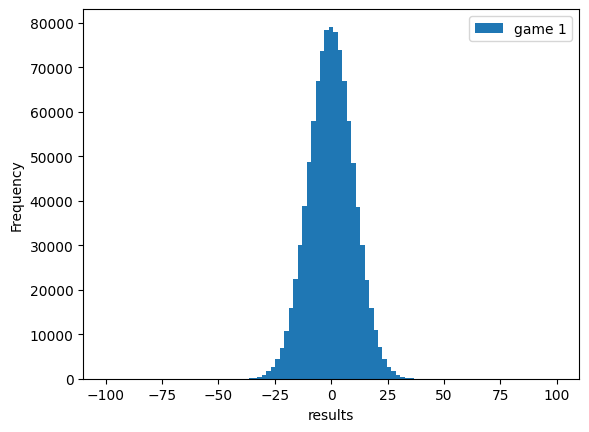

In [ ]:
results.plot.hist(column = "game 1", bins = 101, range = [-100, 100]).set_xlabel("results")

Text(0.5, 0, 'results')

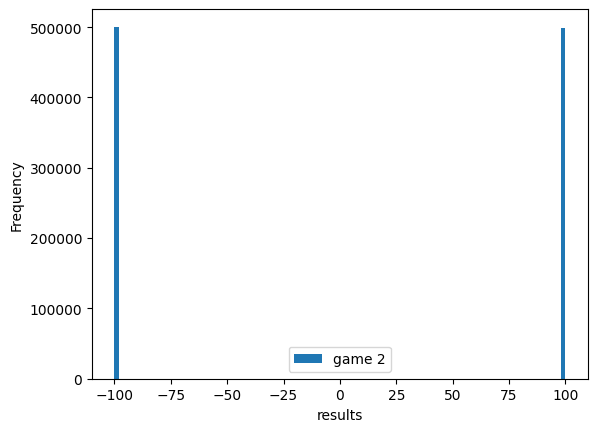

In [ ]:
results.plot.hist(column = "game 2", bins = 101, range = [-100, 100]).set_xlabel("results")

## A better algorithm for maximum drawdown
When we calculated the maximum drawdown, we ran through two nested loops.\
This algorithm is O(n^2) and can take very long when the dataset gets larger.

The following is a quicker algorithm with time complexity O(n):

We scan through the prices once.\
Through the process, we stored the biggest P(s) because it will make the denominator larger.\
In addition, the lowest P(t) / P(s) are stored.\
In this way, we only get the smallest P(t) / P(s) with s < t.\
Finally, the maximum drawdown is again:\
r_t = -1 + min_{s<t} [ P(t) / P(s) ]

In [ ]:
# another algorithm for maximum drawdown
def max_drawdown_2(x):
  x_list = x['Close'].tolist()
  ps, pts = x_list[0], 1
  for elem in x_list:
    if ps < elem:
      ps = elem
    else:
      pts = min(pts, elem / ps)
  return pts - 1

The maximum drawdown calculated by this algorithm agrees with the previous result.

In [ ]:
print(f'The maximum drawdown for AAPL: {max_drawdown_2(aapl_day):.2f}')

The maximum drawdown for AAPL: -0.61


In [ ]:
print(f'The maximum drawdown for TXN : {max_drawdown_2(txn_day):.2f}')

The maximum drawdown for TXN : -0.65


In [ ]:
print(f'The maximum drawdown for GRMN: {max_drawdown_2(grmn_day):.2f}')

The maximum drawdown for GRMN: -0.88


In [ ]:
print(f'The maximum drawdown for HLIT: {max_drawdown_2(hlit_day):.2f}')

The maximum drawdown for HLIT: -0.81


In [ ]:
print(f'The maximum drawdown for QMCO: {max_drawdown_2(qmco_day):.2f}')

The maximum drawdown for QMCO: -0.98
